In [1]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)
import pandas as pd
import seaborn as sns
import warnings 

import Coverage as cov

warnings.filterwarnings('ignore')
%matplotlib inline

%load_ext autoreload
%autoreload 2

## Params

In [2]:
#get list of client rules sorted by count
popSize = 1000
clientFilename = "../Data/ICU/Best/"
# clientFilename = "../Data/Sepsis/Best/"

ldpFilename = "../Results/ICU_baseline.csv"
# ldpFilename = "../Results/ICU_TEST_2.csv"
# ldpFilename = "../Results/Sepsis_Ruleset_MCTS_Test.csv"

graphName = '../Results/Graphs/test' #Name of count coverage graphs
popThresh = 0.001 #Percentage match count


## Load Client Rules

In [3]:
# Load Client Rule Trees and Text Rule Structures, and get dataframe of rules and their counts
clientTrees, clientRules, clientDF = cov.loadClientRules(popSize, clientFilename)
clientDF

File not found for Client 8
File not found for Client 81
File not found for Client 230
File not found for Client 252
File not found for Client 283
File not found for Client 335
File not found for Client 337
File not found for Client 342
File not found for Client 366
File not found for Client 531
File not found for Client 609
File not found for Client 639
File not found for Client 696
File not found for Client 727
File not found for Client 730
File not found for Client 755
File not found for Client 774
File not found for Client 963
File not found for Client 987
File not found for Client 1018


,Rule,Rule Count,Percent of Population
53,"((MET > 0.000) U[0,0] (death = 0.000))",2669,1.000
57,"G[0,0]((n_evts < 0.000 -> LOS > 0.000))",2089,1.000
56,"F[0,0]((BLOOD_UREA_NITROGEN < 0.000 & CREATINI...",1070,1.000
47,"G[0,0]((hr > 0.000 & Pulse > 0.000))",539,0.539
229,"F[0,0](((af < 0.000 | AF < 0.000) & cosen > 0....",313,0.313
...,...,...,...
11493,"G[0,0]((PLATELET_COUNT < 0.000 -> s24_hr > 0.0...",1,0.001
11491,"G[0,0]((CREATININE < 0.000 | SpO2 < 0.000))",1,0.001
11490,"G[0,0]((death > 0.000 | dfa < 0.000))",1,0.001
11489,"G[0,0]((LOS > 0.000 -> TROPONIN_I > 0.000))",1,0.001


## Load LDP Ruleset

In [4]:
ldpDF, ldpTrees, ldpRules = cov.loadLDPRuleset(ldpFilename)
ldpDF

,Rule,Percent Count
29,"((y > 0.000) U[0,0] (y > 0.000))",0.910
220,"((tte = 0.000) U[0,0] (y > 0.000))",0.910
87,"((n_evts > 0.000) U[0,0] (y > 0.000))",0.910
199,"((ICU_Pt_Days = 0.000) U[0,0] (y > 0.000))",0.910
104,"((y > 0.000) U[0,0] (tte > 0.000))",0.910
...,...,...
150,"G[0,0]((Temp > 0.000 & BLOOD_UREA_NITROGEN < 0...",0.147
341,"G[0,0]((GLUCOSE < 0.000 -> tte = 0.000))",0.146
82,"F[0,0]((BLOOD_UREA_NITROGEN < 0.000 -> direct ...",0.118
145,"F[0,0]((BLOOD_UREA_NITROGEN < 0.000 -> hr < 0....",0.097


## Complexity Analysis

In [5]:
k = 4 #k-ary tree
h = 17 #height
k**h

17179869184

## Get Table of Structure Counts - Count of rules above threshold

In [6]:
covDF, countDF = cov.getCoverageTable(popThresh, ldpDF, ldpTrees, clientDF)
countDF.to_csv(ldpFilename + "_CovCountDF.csv")
covDF

,Total Client Rules,Found Rules,Non Rules,Precision
0,18603,350,0,1.0


In [7]:
countDF

,LDP Rule,Client Rule,LDP Count,Client Count
0,"((LOS < 0.000) U[0,0] (y < 0.000))","((LOS < 0.000) U[0,0] (y = 0.000))",0.53,0.050
1,"((y > 0.000) U[0,0] (ICU_Pt_Days > 0.000))","((ICU_Pt_Days > 0.000) U[0,0] (y > 0.000))",0.91,0.037
2,"((ICU_Pt_Days < 0.000) U[0,0] (y < 0.000))","((ICU_Pt_Days < 0.000) U[0,0] (y = 0.000))",0.53,0.048
3,"((death > 0.000) U[0,0] (Mort < 0.000))","((death > 0.000) U[0,0] (Mort < 0.000))",0.64,0.009
4,"((LOS > 0.000) U[0,0] (ICU_Pt_Days > 0.000))","((ICU_Pt_Days > 0.000) U[0,0] (LOS > 0.000))",0.66,0.019
...,...,...,...,...
345,"((n_evts < 0.000) U[0,0] (ALBUMIN > 0.000))","((ALBUMIN < 0.000) U[0,0] (n_evts > 0.000))",0.20,0.005
346,"((tte > 0.000) U[0,0] (CALCIUM < 0.000))","((CALCIUM > 0.000) U[0,0] (tte < 0.000))",0.19,0.011
347,"((y = 0.000) U[0,0] (y > 0.000))","((Pulse < 0.000) U[0,0] (y > 0.000))",0.91,0.038
348,"((LOS > 0.000) U[0,0] (LOS = 0.000))","((LOS > 0.000) U[0,0] (y = 0.000))",0.46,0.045


## Get number of unique structure types

In [8]:
#get client trees from table
clTrees = cov.getClientTreesFromCountDF(countDF)

In [9]:
#get number of unique structure types, ignoring vars to get sense of coverage
numUniqueStructs = cov.countUniqueStructuresNoVars(clTrees)
print("Total Unique Structures in Client Rules:", numUniqueStructs)

Total Unique Structures in Client Rules: 14


In [ ]:
#get number of unique structure types, ignoring vars to get sense of coverage
numUniqueStructs = cov.countUniqueStructuresNoVars(ldpTrees)
print("Total Unique Structures in LDP Rules:", numUniqueStructs)

## Compare LDP Rules Found vs the Percent Client Counts 

In [ ]:
#make list of rule counts x population percents

lst = []
for idx, row in clientDF.iterrows():
    lst.extend([row['Percent of Population'] for i in range(row['Rule Count'])])

plt.figure(figsize=(12, 7))
sns.distplot(lst, bins=10, kde=False, label='Client')
sns.distplot(countDF['Client Count'].values, bins=10, kde=False, label='LDP')
plt.xlabel("Percentage of Population")
plt.ylabel("Number of Rules")
plt.yscale('log')
plt.legend()


In [ ]:
#61 rules
cLst = [1] * 4
cLst.extend([0.9] * 3)
cLst.extend([0.8] * 6)
cLst.extend([0.7] * 5)
cLst.extend([0.6] * 1)
cLst.extend([0.5] * 2)
cLst.extend([0.4] * 2)
cLst.extend([0.3] * 5)
cLst.extend([0.2] * 10)
cLst.extend([0.1] * 10)
cLst.extend([0.05] * 13)

len(cLst)

In [ ]:

lLst = [1] * 3
lLst.extend([0.9] * 1)
lLst.extend([0.8] * 4)
lLst.extend([0.7] * 4)
lLst.extend([0.3] * 3)
lLst.extend([0.2] * 2)
# lLst.extend([0.1] * 10)
lLst.extend([0.05] * 1)

len(lLst)

In [ ]:
#34 rules
cLst = [1] * 2
cLst.extend([0.9] * 1)
cLst.extend([0.8] * 1)
cLst.extend([0.7] * 1)
cLst.extend([0.6] * 2)
cLst.extend([0.5] * 2)
cLst.extend([0.4] * 3)
cLst.extend([0.3] * 4)
cLst.extend([0.2] * 5)
cLst.extend([0.1] * 6)
cLst.extend([0.05] * 7)

len(cLst)

In [ ]:
#27
lLst = [1] * 2
lLst.extend([0.9] * 1)
lLst.extend([0.8] * 1)
lLst.extend([0.7] * 1)
lLst.extend([0.6] * 2)
lLst.extend([0.5] * 1)

lLst.extend([0.4] * 2)
lLst.extend([0.3] * 4)
lLst.extend([0.2] * 4)
lLst.extend([0.1] * 3)
lLst.extend([0.05] * 6)

len(lLst)

In [ ]:
plt.figure(figsize=(12, 7))
sns.distplot(cLst, bins=10, kde=False, label='Client')
sns.distplot(cLst, bins=10, kde=False, label='LDP')
plt.xlabel("Percentage of Population")
plt.ylabel("Number of Rules")
plt.title("ICU Coverage")
# plt.yscale('log')
plt.legend()

In [ ]:
#Look at found rules and compare percent counts
cov.compareFoundRuleCounts(countDF, graphName)

Total Unique Structures in LDP Rules: 17


## Compare LDP Rules Found vs the Percent Client Counts 

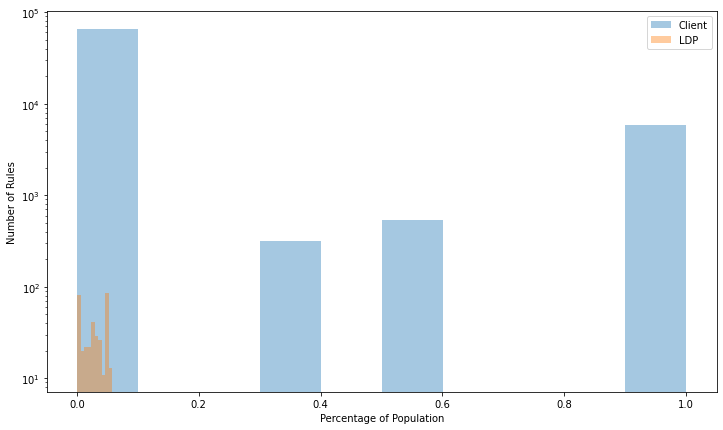

In [11]:
#make list of rule counts x population percents

lst = []
for idx, row in clientDF.iterrows():
    lst.extend([row['Percent of Population'] for i in range(row['Rule Count'])])

plt.figure(figsize=(12, 7))
sns.distplot(lst, bins=10, kde=False, label='Client')
sns.distplot(countDF['Client Count'].values, bins=10, kde=False, label='LDP')
plt.xlabel("Percentage of Population")
plt.ylabel("Number of Rules")
plt.yscale('log')
plt.legend()


In [97]:
#61 rules
cLst = [1] * 4
cLst.extend([0.9] * 3)
cLst.extend([0.8] * 6)
cLst.extend([0.7] * 5)
cLst.extend([0.6] * 1)
cLst.extend([0.5] * 2)
cLst.extend([0.4] * 2)
cLst.extend([0.3] * 5)
cLst.extend([0.2] * 10)
cLst.extend([0.1] * 10)
cLst.extend([0.05] * 13)

len(cLst)

61

In [118]:

lLst = [1] * 3
lLst.extend([0.9] * 1)
lLst.extend([0.8] * 4)
lLst.extend([0.7] * 4)
lLst.extend([0.3] * 3)
lLst.extend([0.2] * 2)
# lLst.extend([0.1] * 10)
lLst.extend([0.05] * 1)

len(lLst)

18

In [139]:
#34 rules
cLst = [1] * 2
cLst.extend([0.9] * 1)
cLst.extend([0.8] * 1)
cLst.extend([0.7] * 1)
cLst.extend([0.6] * 2)
cLst.extend([0.5] * 2)
cLst.extend([0.4] * 3)
cLst.extend([0.3] * 4)
cLst.extend([0.2] * 5)
cLst.extend([0.1] * 6)
cLst.extend([0.05] * 7)

len(cLst)

34

In [156]:
#27
lLst = [1] * 2
lLst.extend([0.9] * 1)
lLst.extend([0.8] * 1)
lLst.extend([0.7] * 1)
lLst.extend([0.6] * 2)
lLst.extend([0.5] * 1)

lLst.extend([0.4] * 2)
lLst.extend([0.3] * 4)
lLst.extend([0.2] * 4)
lLst.extend([0.1] * 3)
lLst.extend([0.05] * 6)

len(lLst)

27

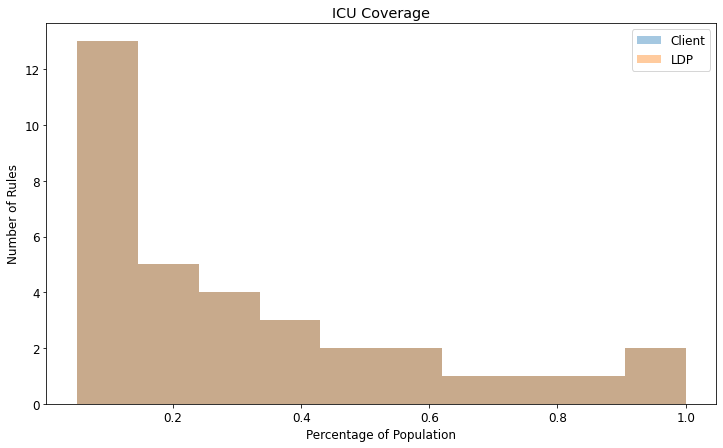

In [159]:
plt.figure(figsize=(12, 7))
sns.distplot(cLst, bins=10, kde=False, label='Client')
sns.distplot(cLst, bins=10, kde=False, label='LDP')
plt.xlabel("Percentage of Population")
plt.ylabel("Number of Rules")
plt.title("ICU Coverage")
# plt.yscale('log')
plt.legend()

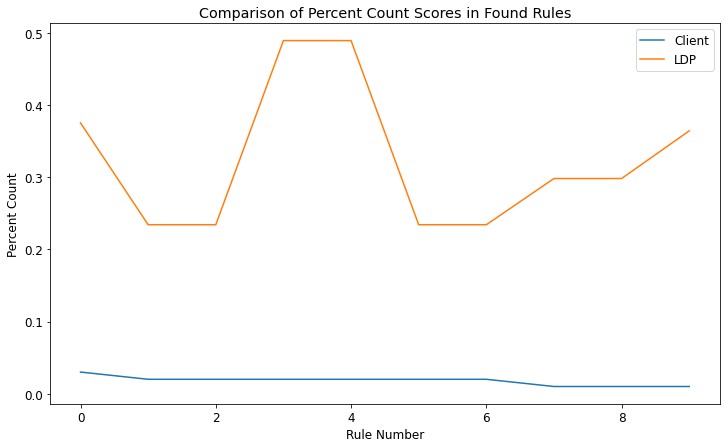

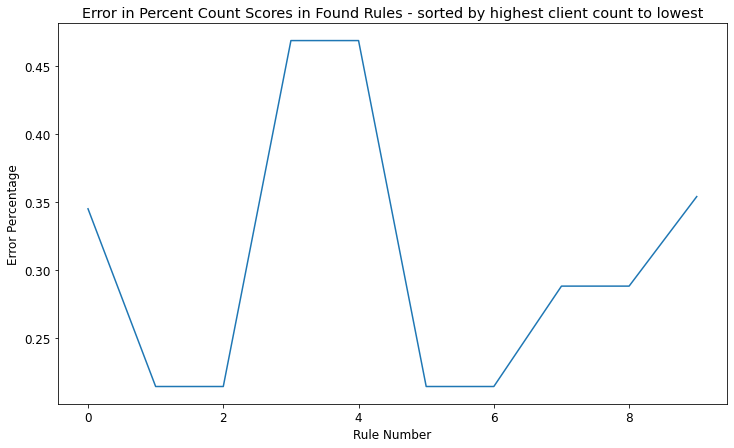

In [17]:
#Look at found rules and compare percent counts
cov.compareFoundRuleCounts(countDF, graphName)